In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# Create a Dataframe and drop extra column
df = pd.read_csv('../data/seattle_911_prepped_no_out.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,day_num,neighborhood,zone1,zone2,zone3,zone4,zone5,zone6,zone7,seasonality
0,11747 Bartlett Av Ne,Medic Response,2010-06-29 08:00:00,47.713787,-122.283848,NaN,NaN,06/29/2010 08:00:00 AM,2010-06-29,08:00:00,...,0,Matthews Beach,0,1,0,0,0,0,0,1.824157
1,700 6th Av S,Aid Response,2010-06-29 07:49:00,47.596676,-122.326370,NaN,NaN,06/29/2010 07:49:00 AM,2010-06-29,07:49:00,...,0,International District,0,0,0,0,1,0,0,1.824157
2,7751 26th Av Nw,Aid Response,2010-06-29 07:49:00,47.685264,-122.389777,NaN,NaN,06/29/2010 07:49:00 AM,2010-06-29,07:49:00,...,0,Loyal Heights,1,0,0,0,0,0,0,1.824157
3,5241 33rd Av S,Aid Response,2010-06-29 07:50:00,47.554718,-122.290486,NaN,NaN,06/29/2010 07:50:00 AM,2010-06-29,07:50:00,...,0,Mid-Beacon Hill,0,0,0,0,0,0,1,1.824157
4,509 3rd Av,Auto Fire Alarm,2010-06-29 07:50:00,47.602114,-122.330809,NaN,NaN,06/29/2010 07:50:00 AM,2010-06-29,07:50:00,...,0,Pioneer Square,0,0,0,0,1,0,0,1.824157


In [10]:
# Remove extraneous columns and create a history lookup dataframe
df_hist = df.drop(labels=(['Address', 'Type', 'Report Location', 'Incident Number',
                           'dt_crop', 'neighborhood', 'date2', 'time2', 'Monday',
                           'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
                           'time', 'Datetime', 'date']), axis=1)
df_hist.head()

,Latitude,Longitude,mariners_home,seahawks_home,sounders_home,trav_holiday,dang_holiday,weekday,night,day_num,zone1,zone2,zone3,zone4,zone5,zone6,zone7,seasonality
0,47.713787,-122.283848,0,0,0,0,0,Tuesday,0,0,0,1,0,0,0,0,0,1.824157
1,47.596676,-122.326370,0,0,0,0,0,Tuesday,0,0,0,0,0,0,1,0,0,1.824157
2,47.685264,-122.389777,0,0,0,0,0,Tuesday,0,0,1,0,0,0,0,0,0,1.824157
3,47.554718,-122.290486,0,0,0,0,0,Tuesday,0,0,0,0,0,0,0,0,1,1.824157
4,47.602114,-122.330809,0,0,0,0,0,Tuesday,0,0,0,0,0,0,1,0,0,1.824157


In [6]:
df_hist.columns

Index([u'Latitude', u'Longitude', u'mariners_home', u'seahawks_home',
       u'sounders_home', u'trav_holiday', u'dang_holiday', u'night', u'Monday',
       u'Saturday', u'Sunday', u'Thursday', u'Tuesday', u'Wednesday',
       u'day_num', u'zone1', u'zone2', u'zone3', u'zone4', u'zone5', u'zone6',
       u'zone7', u'seasonality'],
      dtype='object')

In [7]:
df_hist.to_csv('../data/hist_data_no_out.csv')

In [41]:
from datetime import date

def hist_retriever(df, mariners, seahawks, sounders, date_, night, zone):
    """
    Input:
    df = Pandas DataFrame of hist_date_no_out.csv
    mariners, seahawks, sounders = 0 if no home game and 1 if homegame
    date = date of interest
    night = 0 if 6am to 6pm (day) and 1 if 6pm to 6am (night)
    zone = string such as 'zone1' indicating zone of interest
    Ouput: History DataFrame
    """
    
    # Busy travel times (2010-2020)
    trav_hol = ['2010-11-23', '2010-11-25', '2010-11-26', '2010-12-24', 
                '2010-12-25', '2010-12-26',
                '2011-11-23', '2011-11-24', '2011-11-25', '2011-12-24', 
                '2011-12-25', '2011-12-26', 
                '2012-11-21', '2012-11-22', '2012-11-23', '2012-12-24', 
                '2012-12-25', '2012-12-26',
                '2013-11-27', '2013-11-28', '2013-11-29', '2013-12-24', 
                '2013-12-25', '2013-12-26',
                '2014-11-26', '2014-11-27', '2014-11-28', '2014-12-24', 
                '2014-12-25', '2014-12-26',
                '2015-11-25', '2015-11-26', '2015-11-27', '2015-12-24', 
                '2015-12-25', '2015-12-26',
                '2016-11-23', '2016-11-24', '2016-11-25', '2016-12-24', 
                '2016-12-25', '2016-12-26',
                '2017-11-22', '2017-11-23', '2017-11-24', '2017-12-24', 
                '2017-12-25', '2017-12-26',
                '2018-11-21', '2018-11-22', '2018-11-23', '2018-12-24', 
                '2018-12-25', '2018-12-26',
                '2019-11-27', '2019-11-28', '2019-11-29', '2019-12-24', 
                '2019-12-25', '2019-12-26',
                '2020-11-25', '2020-11-26', '2020-11-27', '2020-12-24', 
                '2020-12-25', '2020-12-26' ]

    # Dangerous holidays are New Years day and July 4th (2010-2020)
    dang_hol = ['2010-01-01', '2010-07-04', '2011-01-01', '2011-07-04', 
                '2012-01-01', '2012-07-04', '2013-01-01', '2013-07-04', 
                '2014-01-01', '2014-07-04', '2015-01-01', '2015-07-04', 
                '2016-01-01', '2016-07-04', '2017-01-01', '2017-07-04',
                '2018-01-01', '2018-07-04', '2019-01-01', '2019-07-04',
                '2020-01-01', '2020-07-04']
    
    # If major travel holiday, look up historical data on travel holidays
    if date_ in trav_hol:
        history = df[df.trav_holiday == 1]
    
    # If 4th of July or New Years day, look up historical data on those days
    elif date_ in dang_hol:
        history = df[df.dang_holiday == 1]
        
    # Grab historical data based on home games, weekday, and area of Seattle
    else:
        date_ = pd.to_datetime(date_)
        weekday = date_.weekday_name
        history = df[(df.mariners_home == mariners) &
                     (df.seahawks_home == seahawks) &
                     (df.sounders_home == sounders) &
                     (df.weekday == weekday) &
                     (df[zone] == 1)]
        
    return history

In [44]:
history = hist_retriever(df=df_hist, mariners=1, seahawks=1, sounders=1, 
                         date_='2016-07-04', night=1, zone='zone2')

In [46]:
from clustering import clusterer

In [47]:
centroids, clusters = clusterer(history, k=7)

In [48]:
centroids

[(47.575030992217897, -122.30597891439696),
 (47.622608604278064, -122.34810921568616),
 (47.66613855498283, -122.34574269415801),
 (47.532850360000012, -122.28686586666666),
 (47.710522372246672, -122.32602631497788),
 (47.609526589285792, -122.32595657053578),
 (47.548222095522412, -122.37617977910455)]

In [52]:
centroid_df = pd.DataFrame(centroids)
centroid_df.columns = ['Latitude', 'Longitude']
centroid_df

,Latitude,Longitude
0,47.575031,-122.305979
1,47.622609,-122.348109
2,47.666139,-122.345743
3,47.532850,-122.286866
4,47.710522,-122.326026
5,47.609527,-122.325957
6,47.548222,-122.376180


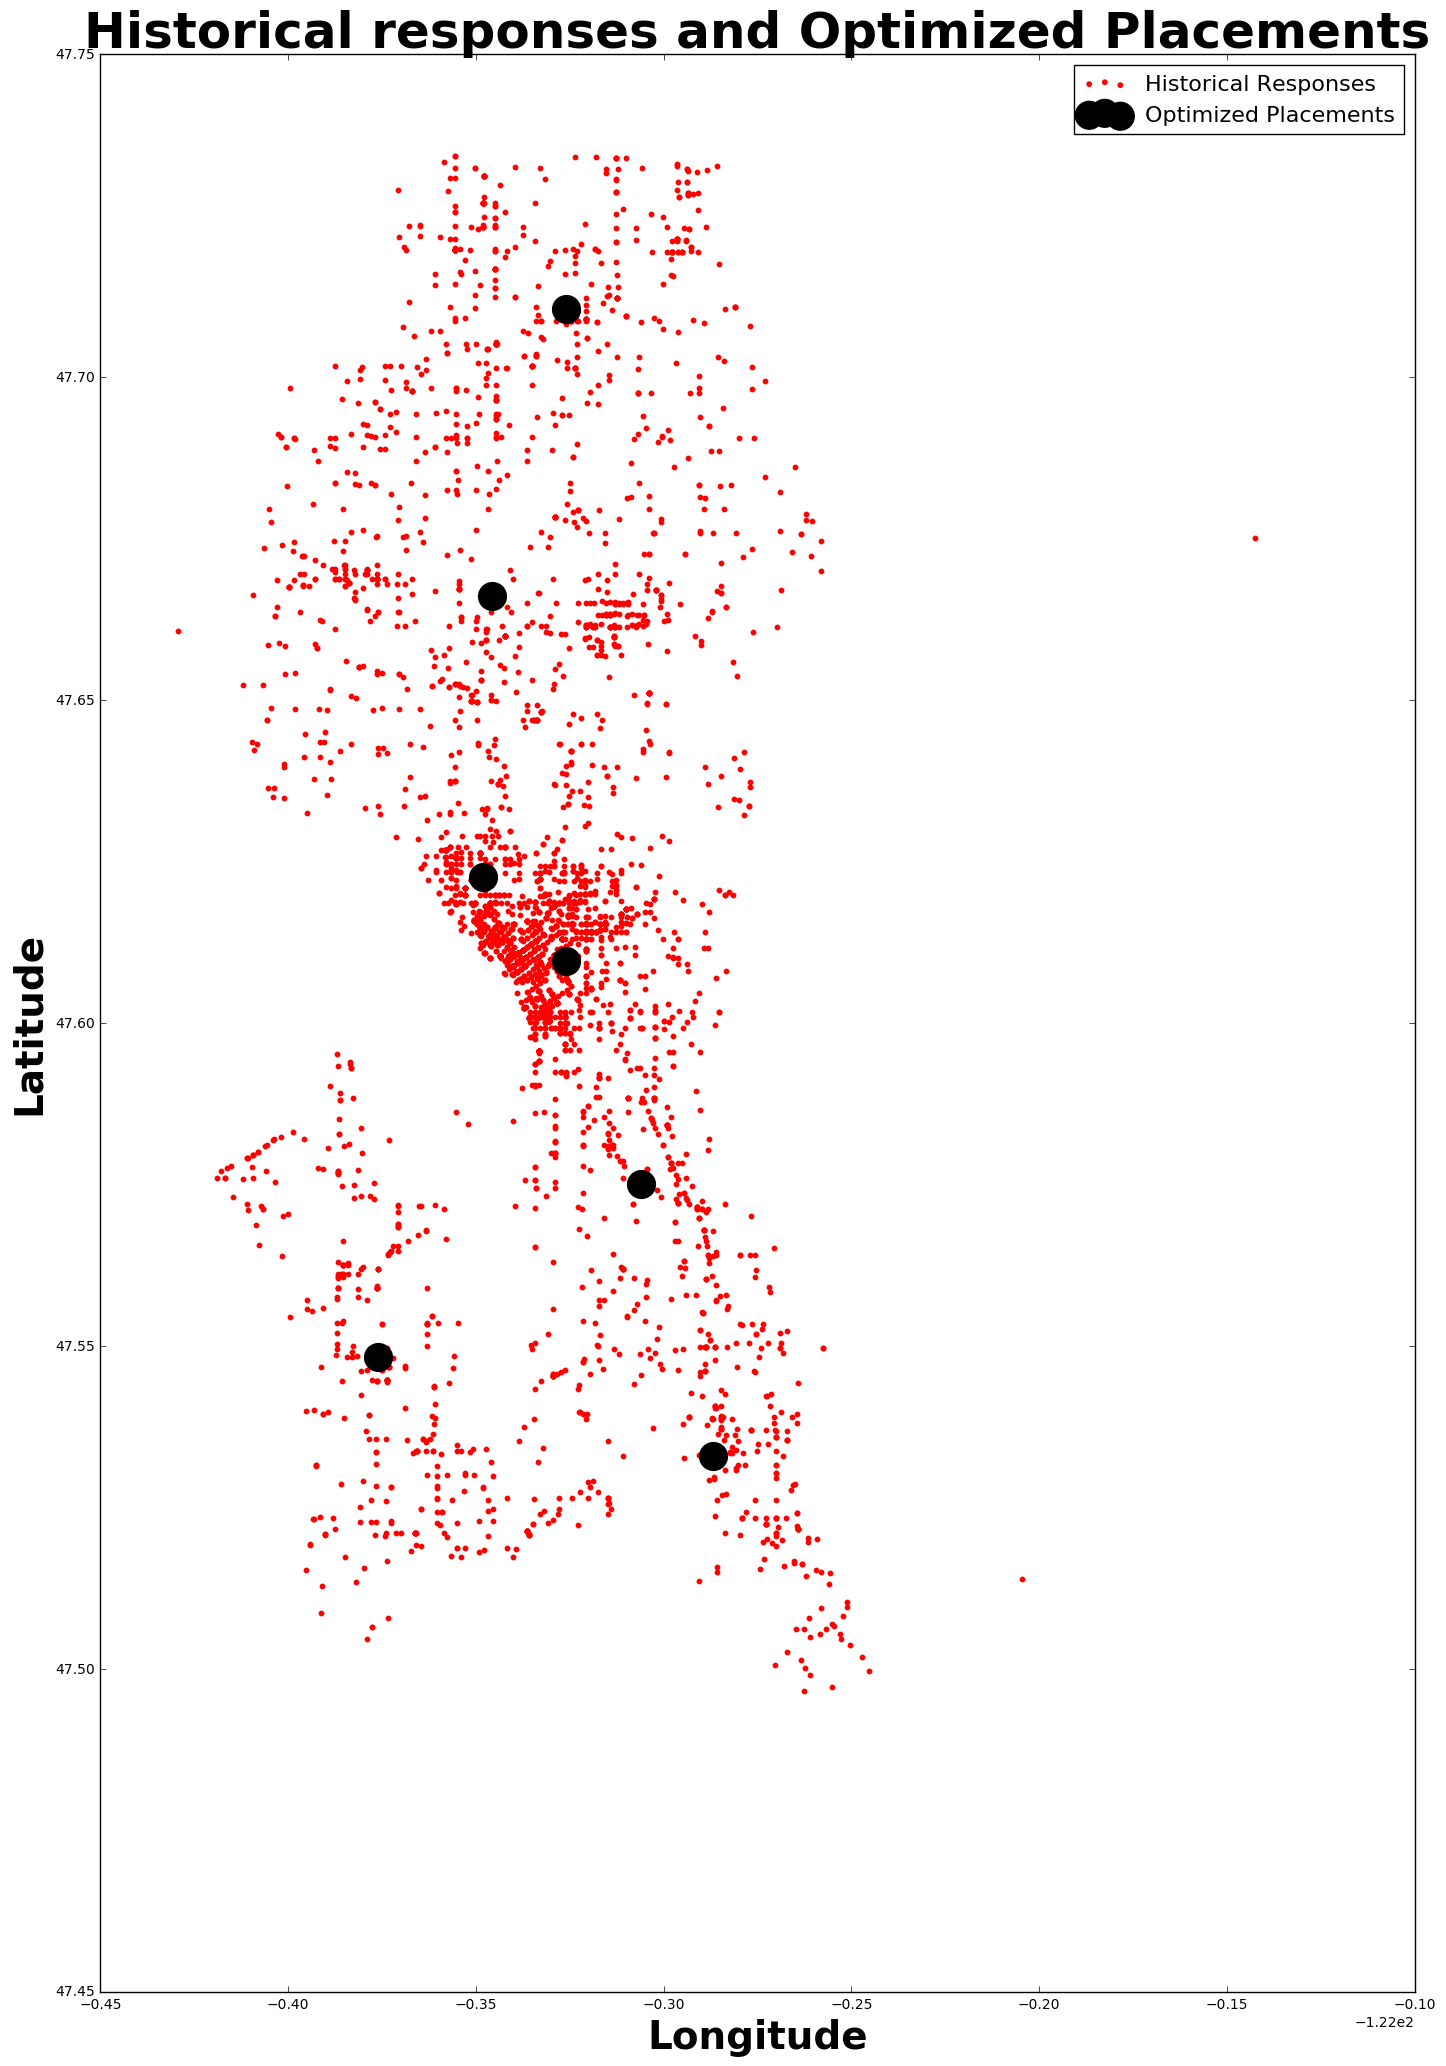

In [54]:
# Plot locations of police responses, actual SPD loc and optimal SPD loc
plt.figure(figsize=(16.96,25))
plt.scatter(history.Longitude, history.Latitude, s=10, color='r')
plt.scatter(centroid_df.Longitude, centroid_df.Latitude, s=400, color='k')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Historical responses and Optimized Placements', fontsize=36, fontweight='bold')
plt.legend(['Historical Responses', 'Optimized Placements'], fontsize=16)